# Random Forest Model
This model was made for the purpose of predicting the winners of upcoming CDL matches

# Loading and reading data from the CSV file

First we are loading the data from our csv file into our code so we can understand it and manipulate it accordingly

In [ ]:
import pandas as pd
# Load the data from the uploaded Excel file
file_path = 'CDL Stats.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head(12)

,Team,K/D,HP Win %,HP K/D,HP Score,HP +/-,S&D Win %,S&D K/D,S&D Round Wins,S&D +/-,CTL Win %,CTL K/D,CTL Round Wins,CTL Round +/-
0,MIA,0.94,0.457,0.97,213.51,-2.86,0.429,0.97,4.64,-0.54,0.348,0.90,1.52,-0.87
1,CAR,0.95,0.400,0.96,209.75,-12.70,0.394,0.88,3.91,-0.97,0.458,0.96,2.00,-0.04
2,LAG,0.96,0.355,0.96,201.20,-27.66,0.457,0.98,4.52,-0.19,0.325,0.93,1.67,-0.82
3,VEG,0.98,0.481,1.00,219.21,-6.61,0.512,0.99,4.55,0.11,0.306,0.94,1.56,-0.97
4,MIN,0.98,0.410,0.98,210.12,-15.74,0.492,0.96,4.47,-0.21,0.536,1.00,2.09,-0.07
5,LAT,0.99,0.516,0.98,218.68,2.96,0.500,1.01,4.52,-0.01,0.513,0.99,2.09,0.11
6,SEA,0.99,0.491,1.00,218.90,-1.18,0.421,0.95,4.32,-0.52,0.438,0.98,1.89,-0.31
7,BOS,0.99,0.491,0.99,221.06,-0.07,0.398,0.95,4.19,-0.62,0.537,1.01,2.16,0.22
8,TOR,1.01,0.546,1.00,223.41,11.74,0.560,1.01,4.70,0.36,0.642,1.02,2.36,0.61
9,NY,1.02,0.560,1.02,224.31,11.22,0.549,1.03,4.68,0.20,0.513,1.01,2.10,0.16


The data above shows us the average for every statistic for a whole team

For example, ATL as a team (4 players) have a combined average K/D of 1.08 midway through the season. ATL is also currently the best team in the league, so if we were to use this data, ATL would win every match up, we dont want that.


Lets check what other information the Excel file has for us by listing all the sheets in the file

In [ ]:
# Load the Excel file and list all sheet names
all_sheets = pd.ExcelFile(file_path)
all_sheet_names = all_sheets.sheet_names
all_sheet_names

['Team Stats',
 'TX',
 'ATL',
 'MIN',
 'NY',
 'LAG',
 'CAR',
 'TOR',
 'VEG',
 'SEA',
 'LAT',
 'MIA',
 'BOS',
 'Player stats']

In the excel file we have 14 sheets, we already know what information is in Team stats, now lets see what information we have on the sheets with team names

In [ ]:
pd.read_excel(file_path, sheet_name='TX')

,Map,Mode,Wins,Losses,Win %,Avg Point Diff,K/D,NTK %,NTD %
0,Karachi,Control,9,2,0.8182,1.36,1.10,0.6881,0.6891
1,Invasion,Control,6,6,0.5000,0.58,1.06,0.7760,0.7608
2,Highrise,Control,3,2,0.6000,0.60,1.01,0.7404,0.7136
3,Vista,Hardpoint,1,0,1.0000,124.00,1.33,0.7000,0.6556
4,Terminal,Hardpoint,4,1,0.8000,44.40,1.09,0.7249,0.6955
5,Sub Base,Hardpoint,5,0,1.0000,62.00,1.10,0.7333,0.6590
6,Skidrow,Hardpoint,7,3,0.7000,20.60,1.06,0.7289,0.7252
7,Rio,Hardpoint,3,4,0.4286,8.86,0.99,0.6540,0.6760
8,Karachi,Hardpoint,4,4,0.5000,-0.50,0.94,0.6569,0.7026
9,Invasion,Hardpoint,6,4,0.6000,21.90,1.01,0.6964,0.6990


In these sheets we have Map and Mode specific statistics for each team.
This is the data we will use when training our model

# Gathering all data in one place


Here we are:
1. loading the data from multiple Excel sheets into
separate data frames
2. modifying each data frame to include a new column identifying the team
3. combining all these individual data frames into a single data frame

This allows for easier manipulation and analysis of the combined data, which is especially useful in data science and sports analytics contexts.

In [ ]:
# Initialize an empty list to hold each team's DataFrame
team_data_frames = []

# Loop through each team sheet and load the data
for team in ['TX', 'ATL', 'MIN', 'NY', 'LAG', 'CAR', 'TOR', 'VEG', 'SEA', 'LAT', 'MIA', 'BOS']:
    # Load the sheet for each team into a DataFrame
    df = pd.read_excel(file_path, sheet_name=team)
    # Add a column for the team name
    df['Team'] = team
    # Append the DataFrame to the list
    team_data_frames.append(df)

# Combine all the DataFrames into one
combined_team_data = pd.concat(team_data_frames, ignore_index=True)

# Display the entire DataFrame
combined_team_data.head(204)


,Map,Mode,Wins,Losses,Win %,Avg Point Diff,K/D,NTK %,NTD %,Team
0,Karachi,Control,9.0,2.0,0.8182,1.36,1.10,0.6881,0.6891,TX
1,Invasion,Control,6.0,6.0,0.5000,0.58,1.06,0.7760,0.7608,TX
2,Highrise,Control,3.0,2.0,0.6000,0.60,1.01,0.7404,0.7136,TX
3,Vista,Hardpoint,1.0,0.0,1.0000,124.00,1.33,0.7000,0.6556,TX
4,Terminal,Hardpoint,4.0,1.0,0.8000,44.40,1.09,0.7249,0.6955,TX
...,...,...,...,...,...,...,...,...,...,...
199,Sub Base,Hardpoint,3.0,1.0,0.7500,19.50,1.12,0.4810,0.4438,BOS
200,Skidrow,Hardpoint,2.0,3.0,0.4000,-20.40,0.92,0.5900,0.6327,BOS
201,Rio,Hardpoint,2.0,1.0,0.6667,14.33,1.04,0.7232,0.7133,BOS
202,Karachi,Hardpoint,2.0,6.0,0.2500,-28.63,0.95,0.7086,0.7566,BOS


Now we have all the data organized and in one place ready to use

# Extract and display unique map and mode combinations

After studying the data, we can see that there are some maps that are not played in certain modes
For example: The map Terminal is only played in one game mode, SND and nothing else.

In [ ]:
# This line selects only the 'Map' and 'Mode' columns from the
# combined_team_data DataFrame and then uses the drop_duplicates() method to remove any duplicate rows.
unique_maps_modes = combined_team_data[['Map', 'Mode']].drop_duplicates()


# After removing the duplicates we need to reset the DataFrame's index to default
# This ensures that the old index is not added as a column
unique_maps_modes.reset_index(drop=True, inplace=True)

unique_maps_modes.head(17)

,Map,Mode
0,Karachi,Control
1,Invasion,Control
2,Highrise,Control
3,Vista,Hardpoint
4,Terminal,Hardpoint
5,Sub Base,Hardpoint
6,Skidrow,Hardpoint
7,Rio,Hardpoint
8,Karachi,Hardpoint
9,Invasion,Hardpoint


*   Data Cleaning and Exploration helps in understanding what types of game configurations (map and mode combinations) exist within the dataset, which is particularly useful in game analytics or sports statistics.

*   This prepares our data for analysis, by knowing all unique map-mode pairs, we can perform more targeted analysis, such as comparing performance across different game settings or preparing data subsets for further statistical tests or visualizations.


# Feature Engineering

This script calculates differential statistics between pairs of teams for each map and game mode. This involves:

* Creating new features like 'Win % Diff', 'K/D Diff', etc., represent the difference between the two teams' original statistics.

* These features are very useful in predictive modeling because they directly compare the performance metrics of two teams, which might be more predictive of match outcomes than the raw statistics alone.

In [ ]:
import itertools
import pickle


* **itertools**: A module that provides various functions that work on iterators to produce complex iterators. Here, it is used to generate combinations of teams.
* **pickle**: A model Used for serializing and de-serializing Python object structures.

In [ ]:

# Initialize an empty list to store matchup data
matchup_data = []

# Iterate over each map and mode combination
for _, row in unique_maps_modes.iterrows():
    map_name = row['Map']
    mode_name = row['Mode']

    # Get all teams that have data for this map and mode
    valid_teams = combined_team_data[(combined_team_data['Map'] == map_name) & (combined_team_data['Mode'] == mode_name)]['Team'].unique()
    """This line filters combined_team_data to find all unique teams that have played on the given map and mode."""


    # Generate all possible matchups using itertools for these teams
    for team_a, team_b in itertools.combinations(valid_teams, 2):
        # Filter data for Team A and Team B
        # These lines retrieve the specific data for each team concerning the current map and mode.
        team_a_data = combined_team_data[(combined_team_data['Team'] == team_a) & (combined_team_data['Map'] == map_name) & (combined_team_data['Mode'] == mode_name)]
        team_b_data = combined_team_data[(combined_team_data['Team'] == team_b) & (combined_team_data['Map'] == map_name) & (combined_team_data['Mode'] == mode_name)]

        # This block of code checks if data is available for both team
        if not team_a_data.empty and not team_b_data.empty:
            # If theres data for both teams we then calculate the differential features
            diffs = {
                'Team A': team_a,
                'Team B': team_b,
                'Map': map_name,
                'Mode': mode_name,
                'Win % Diff': team_a_data['Win %'].values[0] - team_b_data['Win %'].values[0],
                'K/D Diff': team_a_data['K/D'].values[0] - team_b_data['K/D'].values[0],
                'Avg Point Diff Diff': team_a_data['Avg Point Diff'].values[0] - team_b_data['Avg Point Diff'].values[0],
                'NTK % Diff': team_a_data['NTK %'].values[0] - team_b_data['NTK %'].values[0],
                'NTD % Diff': team_a_data['NTD %'].values[0] - team_b_data['NTD %'].values[0]
            }
            matchup_data.append(diffs)

# Convert the list of dictionaries to a DataFrame
matchup_df = pd.DataFrame(matchup_data)
matchup_df.to_pickle('matchup_df.pkl')

# check features for encoding
print(matchup_df.columns)

Index(['Team A', 'Team B', 'Map', 'Mode', 'Win % Diff', 'K/D Diff',
       'Avg Point Diff Diff', 'NTK % Diff', 'NTD % Diff'],
      dtype='object')


# Encoding

This code performs several tasks related to:
* encoding categorical data from an Excel sheet
* saving these encoders to files
* loading them for use

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Example list of teams, maps, and modes
teams = ['Team A', 'Team B', 'TX', 'ATL', 'NY', 'MIN', 'LAG', 'CAR', 'TOR', 'VEG', 'SEA', 'LAT', 'MIA', 'BOS']
maps = ['6 Star', 'Highrise', 'Karachi', 'Rio', 'Invasion', 'Terminal', 'Vista', 'Skidrow', 'Sub Base']
modes = ['Hardpoint', 'Control', 'SND']

# Create and fit the label encoders
team_encoder = LabelEncoder()
team_encoder.fit(teams)
map_encoder = LabelEncoder()
map_encoder.fit(maps)
mode_encoder = LabelEncoder()
mode_encoder.fit(modes)

# Save the encoders to files
with open('team_encoder.pkl', 'wb') as f:
    pickle.dump(team_encoder, f)
with open('map_encoder.pkl', 'wb') as f:
    pickle.dump(map_encoder, f)
with open('mode_encoder.pkl', 'wb') as f:
    pickle.dump(mode_encoder, f)

# Assuming that matchup_df is already defined and has appropriate columns
# Load the encoders (now that they are actually saved)
with open('team_encoder.pkl', 'rb') as f:
    loaded_team_encoder = pickle.load(f)
with open('map_encoder.pkl', 'rb') as f:
    loaded_map_encoder = pickle.load(f)
with open('mode_encoder.pkl', 'rb') as f:
    loaded_mode_encoder = pickle.load(f)

# Apply the encoders to your DataFrame
matchup_df['Team1 Encoded'] = loaded_team_encoder.transform(matchup_df['Team A'])
matchup_df['Team2 Encoded'] = loaded_team_encoder.transform(matchup_df['Team B'])
matchup_df['Map Encoded'] = loaded_map_encoder.transform(matchup_df['Map'])
matchup_df['Mode Encoded'] = loaded_mode_encoder.transform(matchup_df['Mode'])

# Here we are loading all the encoders from the files into our code to use them in the model training
def load_resources():
    """ Load the trained Random Forest model and the encoders from files. """
    model = pickle.load(open('random_forest_model.pkl', 'rb'))
    team_encoder = pickle.load(open('team_encoder.pkl', 'rb'))
    map_encoder = pickle.load(open('map_encoder.pkl', 'rb'))
    mode_encoder = pickle.load(open('mode_encoder.pkl', 'rb'))
    return model, team_encoder, map_encoder, mode_encoder

# Model Training

I decided to split the data 70-30.
70% of data is used for training while the other 30% is used for testing the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define the feature columns and the target column
feature_cols = ['Team1 Encoded', 'Team2 Encoded', 'Map Encoded', 'Mode Encoded', 'K/D Diff', 'Avg Point Diff Diff', 'NTK % Diff', 'NTD % Diff']
target_col = 'Win % Diff'  # We want to predict Win% diff between two teams based off the feature columns

# Extract features and target from the DataFrame
X = matchup_df[feature_cols]
y = (matchup_df[target_col] > 0).astype(int)  # Convert to binary outcome: 1 if Team A has a positive win % diff, else 0

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Feature importance

* here we see that the most important feature for determining the winner of a match up is AVG point difference.

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to view the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
5,Avg Point Diff Diff,0.418617
4,K/D Diff,0.244781
7,NTD % Diff,0.088580
6,NTK % Diff,0.079679
2,Map Encoded,0.056851
0,Team1 Encoded,0.048894
1,Team2 Encoded,0.041690
3,Mode Encoded,0.020907


# Testing model accuracy, precision, recall and f1-score

In [ ]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Features used in training (assumed based on current script setup)
print("Features used for training:", X_train.columns.tolist())

print("Training feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("Number of features expected in the trained model:", loaded_model.n_features_in_)

Accuracy: 0.8206686930091185
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       152
           1       0.84      0.83      0.83       177

    accuracy                           0.82       329
   macro avg       0.82      0.82      0.82       329
weighted avg       0.82      0.82      0.82       329

Features used for training: ['Team1 Encoded', 'Team2 Encoded', 'Map Encoded', 'Mode Encoded', 'K/D Diff', 'Avg Point Diff Diff', 'NTK % Diff', 'NTD % Diff']
Training feature shape: (767, 8)
Test feature shape: (329, 8)
Number of features expected in the trained model: 8


Based off these results we can infer that our model is doing a pretty good job at predicting winners of CDL matches. Our model does a slightly better job at predicting losers as we can see on Class Report 0
But it has better precision in predicting winners based off class report 1

# Evaluating Random Forest Clasifier model on our data

The operations we are executing in this block of code include:

* predictions
* cross-validation
* visualizing feature importances
* examining correlations among features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Make predictions on the training data
train_predictions = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on the testing data
test_predictions = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Display the accuracy for both training and testing sets
print("Training accuracy, Testing accuracy")
print(train_accuracy, test_accuracy)



Training accuracy, Testing accuracy
1.0 0.8206686930091185


# Cross-validation
* Performs 5-fold cross-validation on the entire dataset (X, y). This method splits the entire dataset into 5 parts, iteratively using 4 parts for training and 1 part for validation. This helps in assessing how well the model generalizes to new data.

CV Average Score:  0.8010543794105438


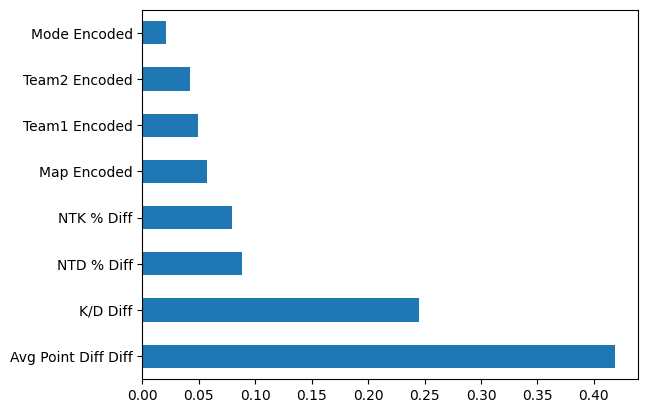

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
print("CV Average Score: ", cv_scores.mean())

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

# Confusion Matrix
* Displays the confusion matrix for the predictions on the testing set, which shows true positives, true negatives, false positives, and false negatives.



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))

Confusion Matrix:
 [[123  29]
 [ 30 147]]


* True Positives (TP): 147 - The model correctly predicted 147 positive outcomes.
* True Negatives (TN): 123 - The model correctly predicted 123 negative outcomes.
* False Positives (FP): 29 - The model incorrectly predicted 29 outcomes as positive when they were negative.
* False Negatives (FN): 30 - The model incorrectly predicted 30 outcomes as negative when they were positive.

# Feature Correlation Matrix

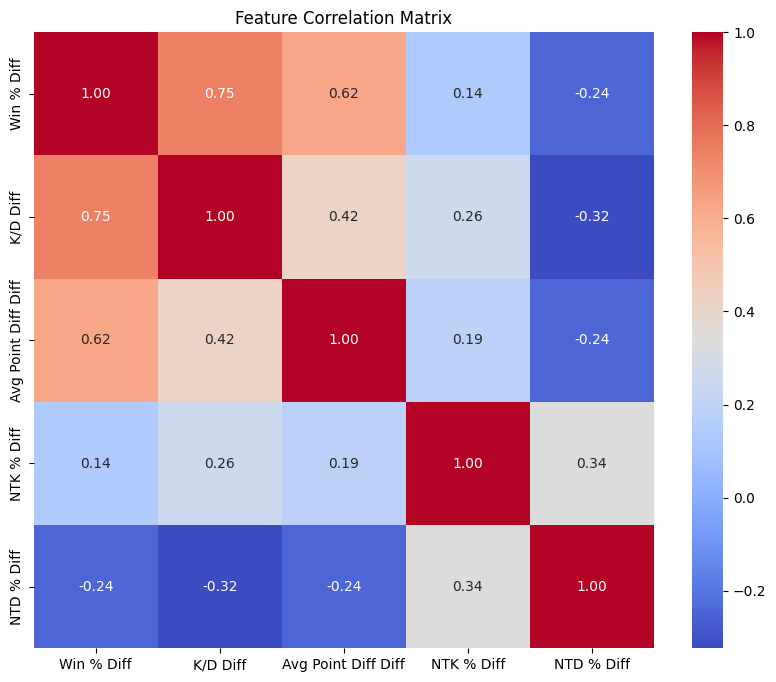

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = matchup_df[['Win % Diff', 'K/D Diff', 'Avg Point Diff Diff', 'NTK % Diff', 'NTD % Diff']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

From this correlation matrix we see that we correctly chose the right features to train our model on. We did not choose to include Win%Diff in our features due to its high correlations with other features.

This high correlations are implications of redundancy in the data, especially with Win%Diff

# Predictions

First we need to load all of our encoders from our files in order for us to use them in our prediction process


In [ ]:
import pickle
import pandas as pd

def load_resources():
    """ Load the trained Random Forest model and encoders from files. """
    model = pickle.load(open('random_forest_model.pkl', 'rb'))
    team_encoder = pickle.load(open('team_encoder.pkl', 'rb'))
    map_encoder = pickle.load(open('map_encoder.pkl', 'rb'))
    mode_encoder = pickle.load(open('mode_encoder.pkl', 'rb'))
    matchup_df = pd.read_pickle('matchup_df.pkl')  # Load the matchup data
    return model, team_encoder, map_encoder, mode_encoder, matchup_df



Then we will collect personalized user input data of what matchup the model should predict

In [ ]:
def get_user_input():
    """ Collect input from the user for the teams and each map in the best-of-5 series. """
    print("Enter the teams for the best-of-5 match prediction.")
    team1 = input("Enter Team 1: ")
    team2 = input("Enter Team 2: ")
    maps = []
    print("Enter the details for each of the 5 maps:")
    for i in range(1, 6):
        map_name = input(f"Enter map {i}: ")
        maps.append(map_name)
    modes = ["Hardpoint", "SND", "Control", "Hardpoint", "SND"]
    return team1, team2, maps, modes



This will pull the matchup info from the DataFrame based on the teams and maps the user inputted.
This script also handles missing values by letting users know if there is or if there is not any matchup history between the selected teams

In [ ]:
def get_matchup_features(team1, team2, map_name, mode, matchup_df):
    """ Retrieve matchup features for the specified teams, map, and mode, adjusting for team order. """
    # Attempt to find the matchup in both possible orders
    condition_a = (matchup_df['Team A'] == team1) & (matchup_df['Team B'] == team2)
    condition_b = (matchup_df['Team A'] == team2) & (matchup_df['Team B'] == team1)
    features = matchup_df[(condition_a | condition_b) & (matchup_df['Map'] == map_name) & (matchup_df['Mode'] == mode)]

    if features.empty:
        print(f"No matchup data available for teams {team1} and {team2} on map {map_name} with mode {mode}")
        return None  # No data available for this matchup

    # Check if the order was reversed and adjust if necessary
    if not features[condition_a].empty:
        features = features[condition_a].iloc[0]
    else:
        features = features[condition_b].iloc[0]
        # Reverse the differential features
        for col in ['K/D Diff', 'Avg Point Diff Diff', 'NTK % Diff', 'NTD % Diff']:
            features[col] *= -1

    return features.drop('Win % Diff', errors='ignore')  # Drop 'Win % Diff' if present



This is our predict outcomes script
with the input parameters being the features we trained our model on.



*   Iterates over each map and mode combination to predict the outcome for each matchup.
*   Uses the model.predict method to generate predictions for each matchup based on the features.
*   Appends the map name, mode, and prediction result (or "Data Not Available" if no data) to the results list.


In [ ]:
def predict_outcomes(model, team_encoder, map_encoder, mode_encoder, team1, team2, maps, modes, matchup_df):
    results = []
    for map_name, mode in zip(maps, modes):
        feature_row = get_matchup_features(team1, team2, map_name, mode, matchup_df)
        if feature_row is None:
            results.append((map_name, mode, "Data Not Available"))
            continue

        # Prepare feature vector for prediction, ensure it matches the trained feature set
        teams_encoded = team_encoder.transform([team1, team2])
        map_encoded = map_encoder.transform([map_name])
        mode_encoded = mode_encoder.transform([mode])
        features = [
            teams_encoded[0], teams_encoded[1],  # Team encodings
            map_encoded[0], mode_encoded[0],     # Map and mode encodings
            feature_row['K/D Diff'],             # Additional match statistics
            feature_row['Avg Point Diff Diff'],
            feature_row['NTK % Diff'],
            feature_row['NTD % Diff']
        ]

        # Predict and store results
        result = model.predict([features])[0]
        results.append((map_name, mode, result))
    return results



The display_results function takes the prediction results and displays them in a user-friendly format, along with determining and announcing the overall winner of the series based on the outcomes of individual maps.

If the matchup data is unavailable, the code will let the user know that It cant make a precise prediction due to lack of matchup data

In [ ]:
def display_results(results, team1, team2):
    """ Display the predicted results of each map and calculate the overall series winner. """
    team_wins = {team1: 0, team2: 0}
    print("\nMatch Prediction Results:")
    for map, mode, result in results:
        if result == "Data Not Available":
            winner_team = "Data Not Available"
            print(f"{map} ({mode}): Winner is {winner_team}")
        else:
            winner_team = team1 if result == 1 else team2
            print(f"{map} ({mode}): Winner is {winner_team}")
            team_wins[winner_team] += 1

    # Calculate series score and winner
    if team_wins[team1] > team_wins[team2]:
        series_winner = team1
        series_score = f"{team_wins[team1]}-{team_wins[team2]}"
    else:
        series_winner = team2
        series_score = f"{team_wins[team2]}-{team_wins[team1]}"

    print(f"\nSeries Winner: {series_winner} with a score of {series_score}")


In [ ]:
def main():
    """ Load model and encoders, get user inputs, make predictions, and display results. """
    model, team_encoder, map_encoder, mode_encoder, matchup_df = load_resources()
    team1, team2, maps, modes = get_user_input()
    results = predict_outcomes(model, team_encoder, map_encoder, mode_encoder, team1, team2, maps, modes, matchup_df)
    display_results(results, team1, team2)

if __name__ == '__main__':
    main()

Enter the teams for the best-of-5 match prediction.
Enter Team 1: ATL
Enter Team 2: TX
Enter the details for each of the 5 maps:
Enter map 1: 6 Star
Enter map 2: Highrise
Enter map 3: Highrise
Enter map 4: Rio
Enter map 5: 6 Star
No matchup data available for teams ATL and TX on map 6 Star with mode SND

Match Prediction Results:
6 Star (Hardpoint): Winner is TX
Highrise (SND): Winner is ATL
Highrise (Control): Winner is ATL
Rio (Hardpoint): Winner is ATL
6 Star (SND): Winner is Data Not Available

Series Winner: ATL with a score of 3-1


<ipython-input-39-3c07da2cde1b>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not features[condition_a].empty:
<ipython-input-39-3c07da2cde1b>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features = features[condition_b].iloc[0]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-39-3c07da2cde1b>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not features[condition_a].empty:
<ipython-input-39-3c07da2cde1b>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features = features[condition_b].iloc[0]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-39-3c